In [154]:
import numpy as np 
import pandas as pd #for data frame
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 1) # seaborn 스타일과 폰트 크기 고정
import missingno as msno

# 경고 무시하기
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [155]:
# 데이터 읽기
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [156]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


> 유실된 데이터 확인하기 - null 값

In [158]:
train.shape

(891, 12)

In [159]:
test.shape

(418, 11)

In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [161]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [162]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [163]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

> 데이터 가시화

In [164]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize =(10,5))

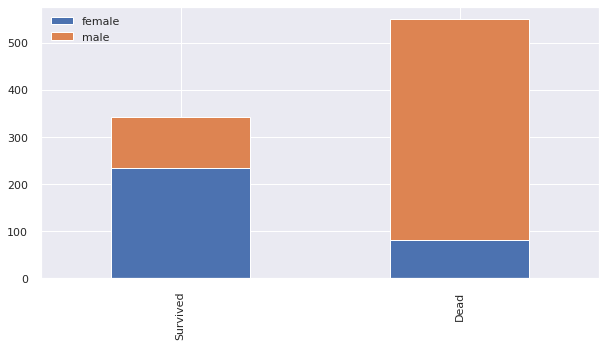

In [165]:
bar_chart('Sex')

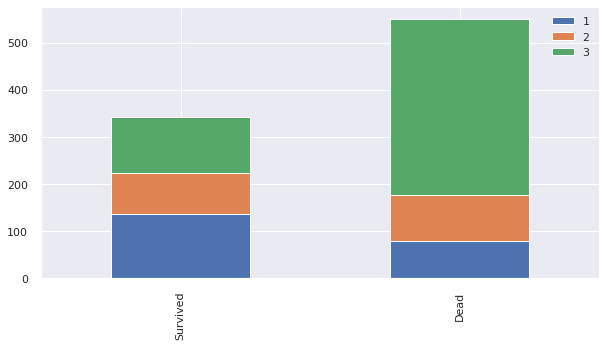

In [166]:
bar_chart('Pclass')

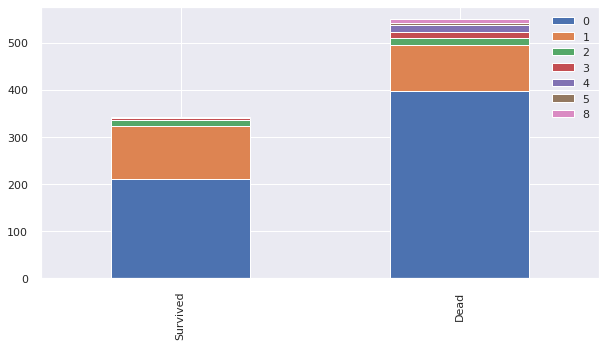

In [167]:
bar_chart('SibSp')

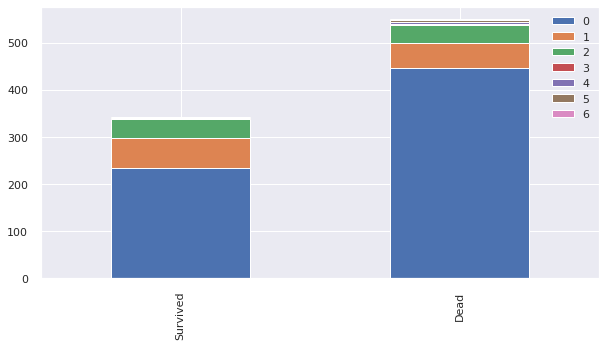

In [168]:
bar_chart('Parch')

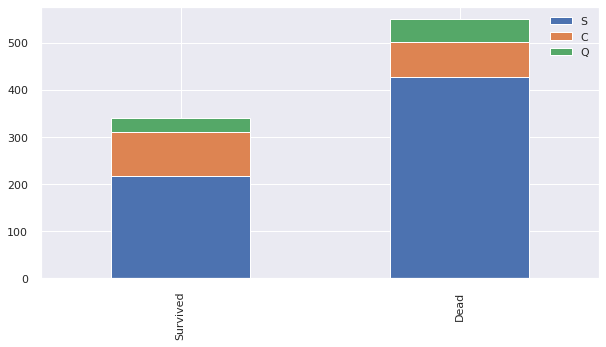

In [169]:
bar_chart('Embarked')

이름은 벡터 값으로 바꿀 수 없고, 불필요한 정보이다.
반면에, 이름에서 title(mr, miss, mrs,dr 등)은 유용한 정보가 될 수 있다.
-> 이름에서 title 정보만 빼준다.

**result) 속성값: name 제거, title 추가**

In [170]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [171]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Countess      1
Sir           1
Jonkheer      1
Don           1
Lady          1
Capt          1
Mme           1
Name: Title, dtype: int64

In [172]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [173]:
# mr=0, miss=1, mrs=2, others=3
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

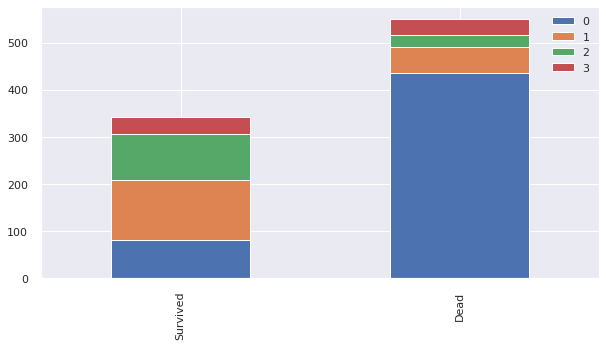

In [174]:
bar_chart('Title')

In [175]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [176]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [177]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


성별 (남자=0, 여자=1) 

! 벡터값으로 바꾸기

In [178]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

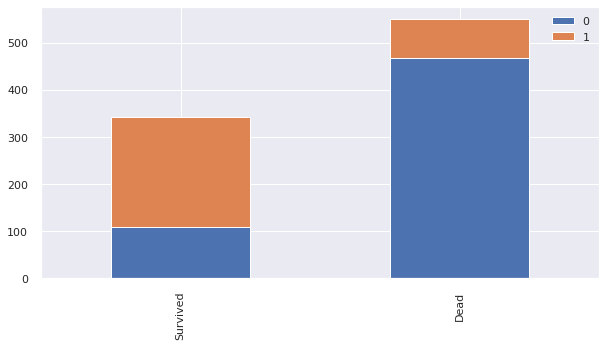

In [192]:
bar_chart('Sex')

나이 (20세 미만=0, 20세 이상=1)

주의: 유실된 정보 존재

In [179]:
# 유실된 정보 -> null값에 각 title의 중앙값을 할당하였다.
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [184]:
train['Child'] = 0
train.loc[train['Age'] < 20, 'Child'] = 0
train.loc[train['Age'] >= 20, 'Child'] = 1

In [187]:
test['Child'] = 0
test.loc[train['Age'] < 20, 'Child'] = 0
test.loc[train['Age'] >= 20, 'Child'] = 1

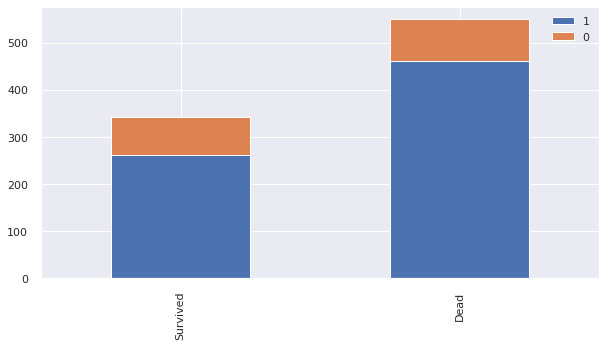

In [188]:
bar_chart('Child')

위 막대그래프로 잘 모르겠다 -> '수치화'해보자

In [189]:
train["Child"].value_counts()

1    722
0    169
Name: Child, dtype: int64

In [190]:
# 0: 어른이 살 확률, 1: 어른이 죽을 확률
train["Survived"][train["Child"]==1].value_counts(normalize=True)

0    0.638504
1    0.361496
Name: Survived, dtype: float64

In [191]:
# 0: 아이가 살 확률, 1: 어린이가 죽을 확률
train["Survived"][train["Child"]==0].value_counts(normalize=True)

0    0.52071
1    0.47929
Name: Survived, dtype: float64

클래스 (1등급: 1, 2등급: 2, 3등급: 3)

주의) 유실된 정보는 고려 안 함.

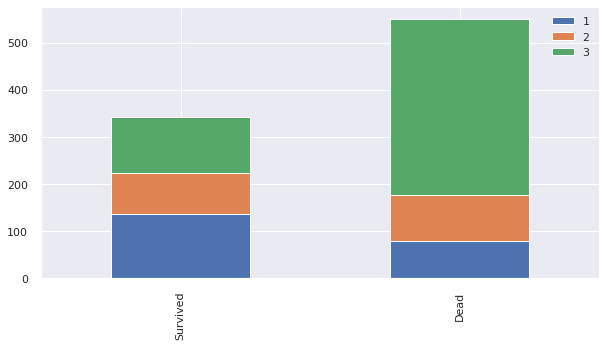

In [204]:
bar_chart("Pclass")

Pclass에 따른 survival 가능성을 '수치'로 표현해보자

In [205]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [209]:
# 0: 퍼스트 클래스인 사람이 죽을 확률, 1: 퍼스트 클래스인 사람이 살 확률
train["Survived"][train["Pclass"]==1].value_counts(normalize=True)

1    0.62963
0    0.37037
Name: Survived, dtype: float64

In [210]:
# 0: 비즈니스 클래스인 사람이 죽을 확률, 1: 비즈니스 클래스인 사람이 살 확률
train["Survived"][train["Pclass"]==2].value_counts(normalize=True)

0    0.527174
1    0.472826
Name: Survived, dtype: float64

In [211]:
# 0: 이코노미 클래스인 사람이 죽을 확률, 1: 이코노미 클래스인 사람이 살 확률
train["Survived"][train["Pclass"]==3].value_counts(normalize=True)

0    0.757637
1    0.242363
Name: Survived, dtype: float64

클래스와 상관없이 남자가 죽을 확률이 더 높고, 여자가 살 확률이 더 높은 걸까?

In [215]:
train['Sex_Pclass'] = 0
train.loc[(train['Sex'] == 0) & (train['Pclass']==1), 'Sex_Pclass'] = 0
train.loc[(train['Sex'] == 0) & (train['Pclass']==2), 'Sex_Pclass'] = 1
train.loc[(train['Sex'] == 0) & (train['Pclass']==3), 'Sex_Pclass'] = 2
train.loc[(train['Sex'] == 1) & (train['Pclass']==1), 'Sex_Pclass'] = 3
train.loc[(train['Sex'] == 1) & (train['Pclass']==2), 'Sex_Pclass'] = 4
train.loc[(train['Sex'] == 1) & (train['Pclass']==3), 'Sex_Pclass'] = 5

In [216]:
test['Sex_Pclass'] = 0
test.loc[(test['Sex'] == 0) & (test['Pclass']==1), 'Sex_Pclass'] = 0
test.loc[(test['Sex'] == 0) & (test['Pclass']==2), 'Sex_Pclass'] = 1
test.loc[(test['Sex'] == 0) & (test['Pclass']==3), 'Sex_Pclass'] = 2
test.loc[(test['Sex'] == 1) & (test['Pclass']==1), 'Sex_Pclass'] = 3
test.loc[(test['Sex'] == 1) & (test['Pclass']==2), 'Sex_Pclass'] = 4
test.loc[(test['Sex'] == 1) & (test['Pclass']==3), 'Sex_Pclass'] = 5

in 퍼스트클래스

In [223]:
# 퍼스트 클래스) 0: 남자가 죽을 확률, 1: 남자가 살 확률
train["Survived"][train["Sex_Pclass"]==0].value_counts(normalize=True)

0    0.631148
1    0.368852
Name: Survived, dtype: float64

In [222]:
# 퍼스트 클래스) 0: 여자가 죽을 확률, 1: 여자가 살 확률
train["Survived"][train["Sex_Pclass"]==3].value_counts(normalize=True)

1    0.968085
0    0.031915
Name: Survived, dtype: float64

in 비즈니스 클래스

In [224]:
# 비즈니스 클래스) 0: 남자가 죽을 확률, 1: 남자가 살 확률
train["Survived"][train["Sex_Pclass"]==1].value_counts(normalize=True)

0    0.842593
1    0.157407
Name: Survived, dtype: float64

In [225]:
# 비즈니스 클래스) 0: 여자가 죽을 확률, 1: 여자가 살 확률
train["Survived"][train["Sex_Pclass"]==4].value_counts(normalize=True)

1    0.921053
0    0.078947
Name: Survived, dtype: float64

in 이코노미 클래스

In [227]:
# 이코노미 클래스) 0: 남자가 죽을 확률, 1: 남자가 살 확률
train["Survived"][train["Sex_Pclass"]==2].value_counts(normalize=True)

0    0.864553
1    0.135447
Name: Survived, dtype: float64

In [228]:
# 이코노미 클래스) 0: 남자가 죽을 확률, 1: 남자가 살 확률
train["Survived"][train["Sex_Pclass"]==5].value_counts(normalize=True)

0    0.5
1    0.5
Name: Survived, dtype: float64

클래스와 상관없이 남자가 죽을 확률이 더 높고, 여자가 살 확률이 더 높다는 것을 알 수 있다.